#Import the modules necessary

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [244]:
#Read the companies.csv with appropriate encoding and covert the case of th eprimary column
file_encoding = 'cp1252'        # set file_encoding to the file encoding (utf8, latin1, etc.)
input_companies = open(r"C:\Users\nares\Desktop\PG Diploma\Investment Analysis Assignment\IAA\companies.csv", encoding=file_encoding, errors = 'backslashreplace')
companies = pd.read_csv(input_companies)
companies['permalink'] = companies['permalink'].str.lower()
companies.shape

(66368, 10)

In [245]:
#Read the rounds2.csv with appropriate encoding and covert the case of th eprimary column
file_encoding = 'cp1252'        # set file_encoding to the file encoding (utf8, latin1, etc.)cp1252
input_rounds = open(r'C:\Users\nares\Desktop\PG Diploma\Investment Analysis Assignment\IAA\rounds2.csv', errors = 'backslashreplace')
rounds2 = pd.read_csv(input_rounds)
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
rounds2.shape

(114949, 6)

#Check if there are any duplicate rows

In [5]:
companies[companies.duplicated()]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [246]:
rounds2[rounds2.duplicated()]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


#Fetch unique records from each dataset

In [8]:
companies['permalink'].nunique()

66368

In [247]:
rounds2['company_permalink'].nunique()

66368

In [248]:
companies.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [11]:
rounds2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


#Check if the companies present in rounds2 matches with companies or if tehre are any extras

In [249]:
df_out = pd.merge(rounds2,companies,left_on='company_permalink',right_on='permalink',how='inner',indicator =True)

In [250]:
df_out['_merge'].value_counts()

both          114949
right_only         0
left_only          0
Name: _merge, dtype: int64

#Merge the dataframes on the primary column and get the no of observations

In [251]:
master_frame = pd.merge(companies,rounds2,left_on = 'permalink',right_on = 'company_permalink',how='inner')
master_frame.shape

(114949, 16)

Table 2.1
--> Choose the funding type for the most average investment within 5M-15M limit

In [255]:
IAA_frame = master_frame

In [256]:
IAA_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114949 non-null  object 
 1   name                     114948 non-null  object 
 2   homepage_url             108815 non-null  object 
 3   category_list            111539 non-null  object 
 4   status                   114949 non-null  object 
 5   country_code             106271 non-null  object 
 6   state_code               104003 non-null  object 
 7   region                   104782 non-null  object 
 8   city                     104785 non-null  object 
 9   founded_at               94428 non-null   object 
 10  company_permalink        114949 non-null  object 
 11  funding_round_permalink  114949 non-null  object 
 12  funding_round_type       114949 non-null  object 
 13  funding_round_code       31140 non-null   object 
 14  fund

#Correct  the master_frame dataframe datatypes

In [257]:
IAA_frame['founded_at']= pd.to_datetime(IAA_frame['founded_at'], errors = 'coerce')

In [258]:
IAA_frame['funded_at']= pd.to_datetime(IAA_frame['funded_at'], errors = 'coerce')

Data Preparation and cleaning

In [259]:
IAA_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   permalink                114949 non-null  object        
 1   name                     114948 non-null  object        
 2   homepage_url             108815 non-null  object        
 3   category_list            111539 non-null  object        
 4   status                   114949 non-null  object        
 5   country_code             106271 non-null  object        
 6   state_code               104003 non-null  object        
 7   region                   104782 non-null  object        
 8   city                     104785 non-null  object        
 9   founded_at               94424 non-null   datetime64[ns]
 10  company_permalink        114949 non-null  object        
 11  funding_round_permalink  114949 non-null  object        
 12  funding_round_ty

#Ignored as not specified in Checkpoints -->companies with closed status are ignored, as there is no sense of investing in companies which are already closed.

In [260]:
#IAA_frame = IAA_frame[~(IAA_frame['status'] == 'closed')]

In [261]:
IAA_frame.shape

(114949, 16)

In [262]:
IAA_frame[IAA_frame['raised_amount_usd'].isna()].funding_round_type.value_counts()

seed                     6921
venture                  5266
undisclosed              3315
equity_crowdfunding      2029
angel                    1234
convertible_note          370
private_equity            349
debt_financing            213
non_equity_assistance     118
grant                      76
secondary_market           65
product_crowdfunding       24
post_ipo_equity            10
Name: funding_round_type, dtype: int64

In [263]:
IAA_frame['raised_amount_usd'].isna().value_counts()/len(IAA_frame['raised_amount_usd'])

False    0.826097
True     0.173903
Name: raised_amount_usd, dtype: float64

As number of Nan values are 17% of the total merge and as the raising_amount_usd is the targetted column. So ignoring rows with Nan, instead of the exaggerating the value by imputing with median

In [264]:
IAA_frame['raised_amount_usd'].describe()

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

In [265]:
IAA_frame = IAA_frame[~IAA_frame['raised_amount_usd'].isna()]

In [266]:
IAA_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaT,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-05-01,10000000.0
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,2014-04-09,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,2014-01-03,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaT,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,2014-01-30,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,2007-01-01,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0
6,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaT,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,2014-01-07,41250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114943,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,2012-05-13,/organization/zzzzapp-com,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,NaN,2013-01-08,33149.0
114944,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,2012-05-13,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,2014-01-03,41313.0
114945,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,2012-05-13,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,2013-01-05,32842.0
114947,/organization/ã”asys-2,Ã”asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,2014-01-01,/organization/ã”asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,2015-01-01,18192.0


In [267]:
pd.pivot_table(IAA_frame,values=["raised_amount_usd"],index='funding_round_type',aggfunc=[np.mean,np.median])

,mean,median
,raised_amount_usd,raised_amount_usd
funding_round_type,,
angel,9.586945e+05,400000.0
convertible_note,1.453439e+06,272000.0
debt_financing,1.704353e+07,1100000.0
equity_crowdfunding,5.383682e+05,100000.0
grant,4.300576e+06,201684.0
non_equity_assistance,4.112031e+05,60000.0
post_ipo_debt,1.687046e+08,19950000.0
post_ipo_equity,8.218249e+07,12262852.5


In [268]:
avg_funding_df = IAA_frame.groupby('funding_round_type')['raised_amount_usd'].mean().apply(lambda x: round(x,5)).to_frame().reset_index()

In [269]:
avg_funding_df.sort_values(by='raised_amount_usd',ascending=False)

,funding_round_type,raised_amount_usd
6,post_ipo_debt,1.687046e+08
7,post_ipo_equity,8.218249e+07
10,secondary_market,7.964963e+07
8,private_equity,7.330859e+07
12,undisclosed,1.924237e+07
2,debt_financing,1.704353e+07
13,venture,1.174895e+07
4,grant,4.300576e+06
1,convertible_note,1.453439e+06
9,product_crowdfunding,1.363131e+06


In [270]:
avg_funding_df[(avg_funding_df['raised_amount_usd'] >= 5000000) & (avg_funding_df['raised_amount_usd'] <= 15000000)]

,funding_round_type,raised_amount_usd
13,venture,1.174895e+07


#Table 3.1
#Assumptions clean country_code,statecode,region =na for venture type

In [271]:
dff = IAA_frame

In [272]:
df_fundtype = dff[dff['funding_round_type']=='venture']

In [273]:
df_fundtype

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaT,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-05-01,10000000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaT,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,2014-01-30,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,2007-01-01,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,1997-01-01,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,2009-12-21,719491.0
10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,2011-01-01,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-09-11,20000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114931,/organization/zyraz-technology,Zyraz Technology,http://www.zyraz.com,Biotechnology,closed,MYS,14,MYS - Other,Damansara New Village,1994-01-01,/organization/zyraz-technology,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,A,2009-09-10,7991547.0
114934,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaT,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,2012-10-18,140500.0
114936,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaT,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,2004-12-16,8500000.0
114937,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,2007-01-01,/organization/zytoprotec,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,2013-01-29,2686600.0


In [274]:
df_fundtype['country_code'].isna().value_counts()

False    48111
True      2117
Name: country_code, dtype: int64

In [275]:
df1 = df_fundtype[df_fundtype['country_code'].isna()]

In [276]:
df1['state_code'].isna().value_counts()

True    2117
Name: state_code, dtype: int64

In [277]:
df1['region'].isna().value_counts()

True    2117
Name: region, dtype: int64

All the rows with country_code as NA,has the corresponding state_code & region also has NA. So,removing the NA from country_code 

In [278]:
df_fundtype['country_code'].isna().value_counts()/len(df_fundtype['country_code'])

False    0.957852
True     0.042148
Name: country_code, dtype: float64

In [279]:
df_fundtype = df_fundtype.dropna(subset=['country_code'])

In [280]:
df_fundtype.shape

(48111, 16)

In [281]:
df_Fundsbycountry =  df_fundtype.groupby('country_code')['raised_amount_usd'].sum().to_frame().reset_index()

In [282]:
df_Fundsbycountry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country_code       97 non-null     object 
 1   raised_amount_usd  97 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [283]:
df_Fundsbycountry

,country_code,raised_amount_usd
0,ARE,3.426175e+08
1,ARG,3.143388e+08
2,ARM,2.651750e+07
3,AUS,1.322935e+09
4,AUT,6.309550e+08
...,...,...
92,UKR,1.779246e+07
93,URY,1.983000e+07
94,USA,4.225108e+11
95,VNM,8.488051e+07


In [284]:
df_Fundsbycountry.sort_values(by='raised_amount_usd',ascending=False)[:9]

,country_code,raised_amount_usd
94,USA,4.225108e+11
15,CHN,3.983542e+10
29,GBR,2.024563e+10
39,IND,1.439186e+10
12,CAN,9.583332e+09
28,FRA,7.259537e+09
42,ISR,6.907515e+09
21,DEU,6.346960e+09
45,JPN,3.363677e+09


In [285]:
top9Engcountries = ['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN']

In [286]:
top9Engcountries

['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN']

In [54]:
df_fundtype

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaT,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-05-01,10000000.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,2007-01-01,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,1997-01-01,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,2009-12-21,719491.0
10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,2011-01-01,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-09-11,20000000.0
11,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,2011-01-01,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,2013-03-01,1700000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114931,/organization/zyraz-technology,Zyraz Technology,http://www.zyraz.com,Biotechnology,closed,MYS,14,MYS - Other,Damansara New Village,1994-01-01,/organization/zyraz-technology,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,A,2009-09-10,7991547.0
114934,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaT,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,2012-10-18,140500.0
114936,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaT,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,2004-12-16,8500000.0
114937,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,2007-01-01,/organization/zytoprotec,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,2013-01-29,2686600.0


In [287]:
top9 = df_fundtype[df_fundtype['country_code'].isin(top9Engcountries)]

In [288]:
top9.shape

(44383, 16)

In [289]:
top9

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaT,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-05-01,10000000.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,2007-01-01,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,1997-01-01,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,2009-12-21,719491.0
10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,2011-01-01,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-09-11,20000000.0
11,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,2011-01-01,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,2013-03-01,1700000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114922,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,1998-01-01,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,2013-11-07,14219999.0
114923,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,1998-01-01,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,NaN,2010-01-29,555016.0
114934,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaT,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,2012-10-18,140500.0
114936,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaT,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,2004-12-16,8500000.0


Top 3 English speaking countries with highest investments are - USA, GBR, IND

Checkpoint 4
#Sector Analysis


In [290]:
file_encoding = 'cp1252'        # set file_encoding to the file encoding (utf8, latin1, etc.)
input_mappings = open(r"C:\Users\nares\Desktop\PG Diploma\Investment Analysis Assignment\IAA\mapping.csv", encoding=file_encoding, errors = 'backslashreplace')
mappings = pd.read_csv(input_mappings)

In [291]:
mappings

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [292]:
mappings['category_list'] = mappings['category_list'].str.strip()

In [293]:
mappings['category_list']

0                   NaN
1                    3D
2           3D Printing
3         3D Technology
4            Accounting
             ...       
683           Wholesale
684    Wine And Spirits
685            Wireless
686               Women
687        Young Adults
Name: category_list, Length: 688, dtype: object

In [294]:
mappings =  mappings[~mappings['category_list'].isna()]

In [295]:
mappings

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


#cleaning the mistakes in manual typos or the errors due to encoding/decoding conversions

In [297]:
mappings[mappings['category_list'].str.contains('0')]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
20,Alter0tive Medicine,0,0,0,0,1,0,0,0,0
22,A0lytics,0,0,0,0,0,0,0,0,1
59,Big Data A0lytics,0,0,0,0,0,0,0,0,1
79,Business A0lytics,0,0,0,0,0,0,0,0,1
89,Can0bis,0,0,0,0,1,0,0,0,0
91,Career Ma0gement,0,0,0,0,0,0,0,0,1
103,Chi0 Internet,0,0,0,0,0,0,1,0,0
114,Cloud Ma0gement,0,0,0,0,0,0,1,0,0
145,Contact Ma0gement,0,0,0,0,0,0,0,0,1
198,Digital Rights Ma0gement,0,0,0,1,0,0,0,0,0


In [298]:
mappings['category_list'] = mappings['category_list'].str.replace('0','na')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [299]:
mappings.head(25)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1
10,Advertising Exchanges,0,0,0,0,0,0,0,0,1


In [300]:
sector_mappings = mappings.melt(id_vars=['category_list'],var_name="main_sector",value_vars=['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising'], value_name='Value')

In [301]:
sector_mappings

,category_list,main_sector,Value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0
...,...,...,...
6178,Wholesale,"Social, Finance, Analytics, Advertising",0
6179,Wine And Spirits,"Social, Finance, Analytics, Advertising",0
6180,Wireless,"Social, Finance, Analytics, Advertising",0
6181,Women,"Social, Finance, Analytics, Advertising",0


In [308]:
df_sectorsbyCat = sector_mappings[~(sector_mappings['Value'] == 0)]

In [309]:
df_sectorsbyCat['main_sector'].value_counts()

Others                                     195
Social, Finance, Analytics, Advertising    153
Entertainment                               89
News, Search and Messaging                  72
Health                                      63
Cleantech / Semiconductors                  53
Manufacturing                               40
Automotive & Sports                         22
Name: main_sector, dtype: int64

In [310]:
df_sectorsbyCat

,category_list,main_sector,Value
7,Adventure Travel,Automotive & Sports,1
13,Aerospace,Automotive & Sports,1
44,Auto,Automotive & Sports,1
45,Automated Kiosk,Automotive & Sports,1
46,Automotive,Automotive & Sports,1
...,...,...,...
6112,Social Recruiting,"Social, Finance, Analytics, Advertising",1
6113,Social Television,"Social, Finance, Analytics, Advertising",1
6114,Social Travel,"Social, Finance, Analytics, Advertising",1
6125,Stock Exchanges,"Social, Finance, Analytics, Advertising",1


In [311]:
df_sectorsbyCat.drop(['Value'],axis = 'columns',inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [312]:
df_sectorsbyCat

,category_list,main_sector
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports
...,...,...
6112,Social Recruiting,"Social, Finance, Analytics, Advertising"
6113,Social Television,"Social, Finance, Analytics, Advertising"
6114,Social Travel,"Social, Finance, Analytics, Advertising"
6125,Stock Exchanges,"Social, Finance, Analytics, Advertising"


#pull the primary sectors from top9 dataframe

In [313]:
top9['category_list'].isna().value_counts()

False    44118
True       265
Name: category_list, dtype: int64

In [314]:
top9['category_list'].isna().value_counts()/len(top9['category_list'])

False    0.994029
True     0.005971
Name: category_list, dtype: float64

In [315]:
top9_new =top9[~top9['category_list'].isna()]

In [316]:
#top9_new['cl'] = top9_new['category_list']

In [317]:
top9_new['primary sector'] = top9_new.category_list.str.split('|').str[0]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [319]:
top9_new

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaT,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-05-01,10000000.0,Media
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,2007-01-01,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0,Curated Web
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,1997-01-01,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,2009-12-21,719491.0,Biotechnology
10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,2011-01-01,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-09-11,20000000.0,Analytics
11,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,2011-01-01,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,2013-03-01,1700000.0,Analytics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114922,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,1998-01-01,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,2013-11-07,14219999.0,Biotechnology
114923,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,1998-01-01,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,NaN,2010-01-29,555016.0,Biotechnology
114934,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaT,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,2012-10-18,140500.0,E-Commerce
114936,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaT,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,2004-12-16,8500000.0,Biotechnology


In [320]:
top9_new[top9_new['category_list']=='Android|Databases|E-Commerce|iPhone|Marketplaces|Mobile|Proximity Internet|Startups']

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary sector
113441,/organization/zaarly,Zaarly,http://www.zaarly.com,Android|Databases|E-Commerce|iPhone|Marketplac...,operating,USA,CA,SF Bay Area,San Francisco,2011-02-20,/organization/zaarly,/funding-round/7df09ebb033cac0950d99ba635bb9530,venture,A,2011-10-24,14150000.0,Android


In [321]:
merge_sectormapframe = pd.merge(top9_new,df_sectorsbyCat,left_on='primary sector',right_on = 'category_list',how='inner',indicator = True)

In [322]:
merge_sectormapframe['_merge'].value_counts()

both          43943
right_only        0
left_only         0
Name: _merge, dtype: int64

In [86]:
#merge_sectormapframe_test = pd.merge(top9_new,df_sectorsbyCat,left_on='primary sector',right_on = 'category_list',how='outer',indicator = True)

In [87]:
#merge_sectormapframe_test['_merge'].value_counts()

both          43943
left_only       175
right_only      114
Name: _merge, dtype: int64

In [88]:
#merge_sectormapframe_test[merge_sectormapframe_test['_merge']=='right_only']['category_list_y'].value_counts()

Email Newsletters          1
Lifestyle Products         1
Productivity               1
Realtors                   1
ICT                        1
                          ..
Home Renovation            1
Charities                  1
Music Education            1
Vending and Concessions    1
Tourism                    1
Name: category_list_y, Length: 114, dtype: int64

In [89]:
#top9_new[top9_new['category_list']=='General Public Worldwide']

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary sector


Checkpoint 5
#divide dataframes by 3 top english speaking countries

In [323]:
top3_ENG = merge_sectormapframe[merge_sectormapframe['country_code'].isin(['USA','GBR','IND'])]

In [324]:
top3_ENG

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary sector,category_list_y,main_sector,_merge
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaT,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-05-01,10000000.0,Media,Media,Entertainment,both
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,2011-01-01,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,2015-06-10,15000000.0,Media,Media,Entertainment,both
2,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,2011-01-01,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,2013-07-05,5800000.0,Media,Media,Entertainment,both
3,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,2011-01-01,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,2014-03-26,18000000.0,Media,Media,Entertainment,both
4,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaT,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,2014-06-08,5000000.0,Media,Media,Entertainment,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43937,/organization/yapta,Yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,2007-01-07,/organization/yapta,/funding-round/b1777df10578e852be3afbe3bc325435,venture,D,2013-07-22,4220000.0,Tracking,Tracking,Others,both
43938,/organization/yapta,Yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,2007-01-07,/organization/yapta,/funding-round/ed75e1064eb8b50c01c2e0b691ca9f1e,venture,C,2009-06-25,2000000.0,Tracking,Tracking,Others,both
43939,/organization/yapta,Yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,2007-01-07,/organization/yapta,/funding-round/fc066baf3121b060b574214612a6c946,venture,NaN,2015-07-29,1786563.0,Tracking,Tracking,Others,both
43941,/organization/ziftit,Ziftit,http://www.ziftit.com,Gift Registries|Shopping,closed,USA,CA,San Diego,San Diego,2011-01-02,/organization/ziftit,/funding-round/d5713b26dbc5e0c65ccc426377449435,venture,NaN,2013-09-07,4000000.0,Gift Registries,Gift Registries,Others,both


In [325]:
#top3_ENG
top3_ENG = top3_ENG[(top3_ENG['raised_amount_usd'] >= 5000000) & (top3_ENG['raised_amount_usd'] <= 15000000)]

In [326]:
top3_ENG

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary sector,category_list_y,main_sector,_merge
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaT,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-05-01,10000000.0,Media,Media,Entertainment,both
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,2011-01-01,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,2015-06-10,15000000.0,Media,Media,Entertainment,both
2,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,2011-01-01,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,2013-07-05,5800000.0,Media,Media,Entertainment,both
4,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaT,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,2014-06-08,5000000.0,Media,Media,Entertainment,both
14,/organization/chefs-feed,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,2012-01-01,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,2015-02-26,5000000.0,Media,Media,Entertainment,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43925,/organization/wizrocket-technologies,CleverTap,https://clevertap.com/,Consumer Behavior|Mobile Analytics|SaaS,operating,USA,CA,SF Bay Area,Palo Alto,2013-05-24,/organization/wizrocket-technologies,/funding-round/195738852853780cc8f1220ba6fb761d,venture,A,2015-03-08,8000000.0,Consumer Behavior,Consumer Behavior,"Social, Finance, Analytics, Advertising",both
43929,/organization/user-interface,User Interface,http://www.userinterface.com,User Interface,operating,USA,CA,Bakersfield,California City,NaT,/organization/user-interface,/funding-round/ade267714c6ee533323f46a25b2db237,venture,A,2001-01-24,8250000.0,User Interface,User Interface,Others,both
43930,/organization/vector-watch,Vector Watch,http://www.vectorwatch.com/,Watch|Wearables,operating,GBR,H9,London,London,2013-01-01,/organization/vector-watch,/funding-round/b010e14f723a45d5c8fadb5a857c620b,venture,NaN,2015-11-25,5000000.0,Watch,Watch,Others,both
43931,/organization/washio,Washio,http://www.getwashio.com,Service Industries,operating,USA,CA,Los Angeles,Los Angeles,2013-01-01,/organization/washio,/funding-round/59026d26012c63b42fa2984c8f3c41ec,venture,A,2014-09-06,10500000.0,Service Industries,Service Industries,Others,both


In [327]:
mergedbySectorInvestments = pd.pivot_table(top3_ENG,index=["main_sector"],values=["raised_amount_usd"],columns='country_code',aggfunc=[np.sum,len,np.mean,np.median])

In [95]:
mergedbySectorInvestments

sum                \
                                        raised_amount_usd                 
country_code                                          GBR           IND   
main_sector                                                               
Automotive & Sports                          1.670516e+08  1.369000e+08   
Cleantech / Semiconductors                   1.150140e+09  1.653800e+08   
Entertainment                                4.827847e+08  2.808300e+08   
Health                                       2.145375e+08  1.677400e+08   
Manufacturing                                3.619403e+08  2.009000e+08   
News, Search and Messaging                   6.157462e+08  4.338345e+08   
Others                                       1.283624e+09  1.013410e+09   
Social, Finance, Analytics, Advertising      1.089404e+09  5.505496e+08   

                                                                    len  \
                                                      raised_amount_usd   
country_code                                      USA               GBR   
main_sector                                                               
Automotive & Sports                      1.454104e+09              16.0   
Cleantech / Semiconductors               2.120663e+10             128.0   
Entertainment                            5.099198e+09              56.0   
Health                                   8.211859e+09              24.0   
Manufacturing                            7.258553e+09              42.0   
News, Search and Messaging               1.395957e+10              73.0   
Others                                   2.632101e+10             147.0   
Social, Finance, Analytics, Advertising  2.380738e+10             133.0   

                                                                    mean  \
                                                       raised_amount_usd   
country_code                               IND     USA               GBR   
main_sector                                                                
Automotive & Sports                       13.0   167.0      1.044072e+07   
Cleantech / Semiconductors                20.0  2300.0      8.985466e+06   
Entertainment                             33.0   591.0      8.621155e+06   
Health                                    19.0   909.0      8.939063e+06   
Manufacturing                             21.0   799.0      8.617627e+06   
News, Search and Messaging                52.0  1582.0      8.434880e+06   
Others                                   110.0  2950.0      8.732138e+06   
Social, Finance, Analytics, Advertising   60.0  2714.0      8.191008e+06   

                                                                     \
                                                                      
country_code                                      IND           USA   
main_sector                                                           
Automotive & Sports                      1.053077e+07  8.707212e+06   
Cleantech / Semiconductors               8.269000e+06  9.220273e+06   
Entertainment                            8.510000e+06  8.628085e+06   
Health                                   8.828421e+06  9.033949e+06   
Manufacturing                            9.566667e+06  9.084547e+06   
News, Search and Messaging               8.342972e+06  8.824000e+06   
Others                                   9.212814e+06  8.922375e+06   
Social, Finance, Analytics, Advertising  9.175826e+06  8.772062e+06   

                                                   median              \
                                        raised_amount_usd               
country_code                                          GBR         IND   
main_sector                                                             
Automotive & Sports                            10945000.0  11000000.0   
Cleantech / Semiconductors                      8460000.0   8000000.0   
Entertainment                                   

#mostly the investments are in Others main_sector, with linearity in mena ,Median and high number of investments

#Analyse the top 3 English speaking country wise Investment spread across the main_sector

In [329]:
masterframe_USA = top3_ENG[top3_ENG['country_code']=='USA']

In [330]:
masterframe_USA.shape

(12012, 20)

In [331]:
masterframe_USA['main_sector'].describe()

count      12012
unique         8
top       Others
freq        2950
Name: main_sector, dtype: object

In [332]:
masterframe_USA['raised_amount_usd'].describe()

count    1.201200e+04
mean     8.934257e+06
std      3.075071e+06
min      5.000000e+06
25%      6.012337e+06
50%      8.304890e+06
75%      1.100000e+07
max      1.500000e+07
Name: raised_amount_usd, dtype: float64

In [333]:
masterframe_USA['raised_amount_usd'].sum()

107318294664.0

In [334]:
masterframe_USA['main_sector'].value_counts().sort_values(ascending=False)

Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2300
News, Search and Messaging                 1582
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: main_sector, dtype: int64

In [335]:
masterframe_USA.groupby(by = 'main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2300
News, Search and Messaging                 1582
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: raised_amount_usd, dtype: int64

In [336]:
masterframe_USA.groupby(by = 'main_sector')['raised_amount_usd'].sum().sort_values(ascending=False)

main_sector
Others                                     2.632101e+10
Social, Finance, Analytics, Advertising    2.380738e+10
Cleantech / Semiconductors                 2.120663e+10
News, Search and Messaging                 1.395957e+10
Health                                     8.211859e+09
Manufacturing                              7.258553e+09
Entertainment                              5.099198e+09
Automotive & Sports                        1.454104e+09
Name: raised_amount_usd, dtype: float64

In [337]:
masterframe_USA[masterframe_USA['main_sector'] == 'Others'].groupby(by='name')['raised_amount_usd'].sum().sort_values(ascending=False)

name
Virtustream            64300000.0
Capella Photonics      54968051.0
AirTight Networks      54201907.0
deCarta                52100000.0
Black Duck Software    51000000.0
                          ...    
Campus Explorer         5000000.0
Campus Quad             5000000.0
Oculan                  5000000.0
NuView Systems          5000000.0
Dolls Kill              5000000.0
Name: raised_amount_usd, Length: 2049, dtype: float64

In [342]:
masterframe_USA[masterframe_USA['main_sector'] == 'Social, Finance, Analytics, Advertising'].groupby(by='name')['raised_amount_usd'].sum().sort_values(ascending=False)

name
SST Inc. (Formerly ShotSpotter)    67933006.0
Demandbase                         63000000.0
Intacct                            61800000.0
NetBase Solutions                  60600000.0
Lotame                             59700000.0
                                      ...    
Jellyvision                         5000000.0
Yerdle                              5000000.0
EquityMetrix                        5000000.0
Apester                             5000000.0
WibiData                            5000000.0
Name: raised_amount_usd, Length: 1847, dtype: float64

In [340]:
mf5= masterframe_USA.groupby(by =[ 'country_code','main_sector'])['raised_amount_usd'].sum().to_frame().reset_index().sort_values(by='raised_amount_usd',ascending=False)
mf6= masterframe_USA.groupby(by =[ 'country_code','main_sector'])['raised_amount_usd'].count().to_frame().reset_index().sort_values(by='raised_amount_usd',ascending=False)
mf_USA = mf5
mf_USA['Count'] = mf6['raised_amount_usd']
mf_USA['Total Investment'] = mf5['raised_amount_usd']

In [352]:
mf_USA = mf_USA.drop(columns = 'raised_amount_usd',axis=1)

In [353]:
mf_USA

,country_code,main_sector,Count,Total Investment
6,USA,Others,2950,2.632101e+10
7,USA,"Social, Finance, Analytics, Advertising",2714,2.380738e+10
1,USA,Cleantech / Semiconductors,2300,2.120663e+10
5,USA,"News, Search and Messaging",1582,1.395957e+10
3,USA,Health,909,8.211859e+09
4,USA,Manufacturing,799,7.258553e+09
2,USA,Entertainment,591,5.099198e+09
0,USA,Automotive & Sports,167,1.454104e+09


In [343]:
masterframe_GBR = top3_ENG[top3_ENG['country_code']=='GBR']

In [344]:
masterframe_GBR

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary sector,category_list_y,main_sector,_merge
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,2011-01-01,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,2015-06-10,15000000.0,Media,Media,Entertainment,both
2,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,2011-01-01,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,2013-07-05,5800000.0,Media,Media,Entertainment,both
114,/organization/azimo,Azimo,http://azimo.com,Curated Web|Finance Technology|Financial Servi...,operating,GBR,H9,London,London,2012-10-29,/organization/azimo,/funding-round/5eb768935cf9c60b402944b0f476baae,venture,A,2014-11-03,10000000.0,Curated Web,Curated Web,"News, Search and Messaging",both
125,/organization/basekit-platform,BaseKit,http://www.basekit.com,Curated Web|Internet|Web Design,operating,GBR,H9,London,London,2008-01-01,/organization/basekit-platform,/funding-round/8252cd70860ec66a1c7d13b6a2519dc6,venture,NaN,2014-05-13,7000000.0,Curated Web,Curated Web,"News, Search and Messaging",both
126,/organization/basekit-platform,BaseKit,http://www.basekit.com,Curated Web|Internet|Web Design,operating,GBR,H9,London,London,2008-01-01,/organization/basekit-platform,/funding-round/9ceb098a822fb971db490b23c1067336,venture,NaN,2014-03-02,6818631.0,Curated Web,Curated Web,"News, Search and Messaging",both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43682,/organization/perpetuum,Perpetuum,http://www.perpetuum.com/,Wireless,operating,GBR,M4,London,Southampton,2004-01-01,/organization/perpetuum,/funding-round/e26492fb6eddf9086f93362265460739,venture,NaN,2007-12-10,10181710.0,Wireless,Wireless,Entertainment,both
43836,/organization/zoopla,Zoopla,http://www.zoopla.co.uk,Property Management|Real Estate,ipo,GBR,H9,London,London,2007-01-06,/organization/zoopla,/funding-round/0ec759962079a8997eb1632d6c1a769b,venture,NaN,2010-12-23,5005659.0,Property Management,Property Management,"Social, Finance, Analytics, Advertising",both
43837,/organization/zoopla,Zoopla,http://www.zoopla.co.uk,Property Management|Real Estate,ipo,GBR,H9,London,London,2007-01-06,/organization/zoopla,/funding-round/98da1f441a55c9a9629a256828923e38,venture,B,2009-01-19,5440000.0,Property Management,Property Management,"Social, Finance, Analytics, Advertising",both
43889,/organization/yoyo,Yoyo Wallet,http://www.yoyowallet.com,Loyalty Programs|Mobile|Mobile Payments|Retail,operating,GBR,H9,London,London,2013-01-05,/organization/yoyo,/funding-round/b18a6d85f32d12ace2366c0b7f85facc,venture,A,2015-04-15,10000000.0,Loyalty Programs,Loyalty Programs,Others,both


In [345]:
masterframe_GBR['raised_amount_usd'].sum()

5365228300.0

In [346]:
masterframe_GBR['main_sector'].value_counts().sort_values(ascending=False)

Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 128
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: main_sector, dtype: int64

In [347]:
masterframe_GBR.groupby(by = 'main_sector')['raised_amount_usd'].count()

main_sector
Automotive & Sports                         16
Cleantech / Semiconductors                 128
Entertainment                               56
Health                                      24
Manufacturing                               42
News, Search and Messaging                  73
Others                                     147
Social, Finance, Analytics, Advertising    133
Name: raised_amount_usd, dtype: int64

In [348]:
masterframe_GBR.groupby(by = 'main_sector')['raised_amount_usd'].sum()

main_sector
Automotive & Sports                        1.670516e+08
Cleantech / Semiconductors                 1.150140e+09
Entertainment                              4.827847e+08
Health                                     2.145375e+08
Manufacturing                              3.619403e+08
News, Search and Messaging                 6.157462e+08
Others                                     1.283624e+09
Social, Finance, Analytics, Advertising    1.089404e+09
Name: raised_amount_usd, dtype: float64

In [349]:
mf3= masterframe_GBR.groupby(by =[ 'country_code','main_sector'])['raised_amount_usd'].sum().to_frame().reset_index().sort_values(by='raised_amount_usd',ascending=False)
mf4= masterframe_GBR.groupby(by =[ 'country_code','main_sector'])['raised_amount_usd'].count().to_frame().reset_index().sort_values(by='raised_amount_usd',ascending=False)
mf_GBR = mf3
mf_GBR['Count'] = mf4['raised_amount_usd']
mf_GBR['Total Investment'] = mf3['raised_amount_usd']

In [384]:
mf_GBR = mf_GBR.drop(columns = 'raised_amount_usd',axis=1)
mf_GBR = mf_GBR.sort_values(by = 'Count',ascending=False)

In [385]:
mf_GBR

,country_code,main_sector,Count,Total Investment
6,GBR,Others,147,1.283624e+09
7,GBR,"Social, Finance, Analytics, Advertising",133,1.089404e+09
1,GBR,Cleantech / Semiconductors,128,1.150140e+09
5,GBR,"News, Search and Messaging",73,6.157462e+08
2,GBR,Entertainment,56,4.827847e+08
4,GBR,Manufacturing,42,3.619403e+08
3,GBR,Health,24,2.145375e+08
0,GBR,Automotive & Sports,16,1.670516e+08


In [118]:
masterframe_GBR[masterframe_GBR['main_sector'] == 'Others'].groupby(by='name')['raised_amount_usd'].sum().sort_values(ascending=False)

name
Electric Cloud             37000000.0
SenSage                    36250000.0
Enigmatec                  32500000.0
SilverRail Technologies    29000000.0
OpenCloud                  27972766.0
                              ...    
Bacula Systems              5000000.0
Vector Watch                5000000.0
PhotoBox                    5000000.0
The Filter                  5000000.0
BullGuard                   5000000.0
Name: raised_amount_usd, Length: 120, dtype: float64

In [119]:
masterframe_GBR[masterframe_GBR['main_sector'] == 'Social, Finance, Analytics, Advertising'].groupby(by='name')['raised_amount_usd'].sum().sort_values(ascending=False)

name
Celltick Technologies    37500000.0
myThings                 34000000.0
Zopa                     32900000.0
VisualDNA                28550000.0
MarketInvoice            25553007.0
                            ...    
Rangespan                 5000000.0
DueDil                    5000000.0
Tamoco                    5000000.0
MOO.COM                   5000000.0
The Fizzback Group        5000000.0
Name: raised_amount_usd, Length: 104, dtype: float64

In [354]:
masterframe_IND =top3_ENG [top3_ENG['country_code']=='IND']

In [355]:
masterframe_IND.shape

(328, 20)

In [356]:
masterframe_IND['raised_amount_usd'].sum()

2949543602.0

In [357]:
masterframe_IND['main_sector'].value_counts().sort_values(ascending=False)

Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: main_sector, dtype: int64

In [358]:
masterframe_IND.groupby(by = 'main_sector')['raised_amount_usd'].count()

main_sector
Automotive & Sports                         13
Cleantech / Semiconductors                  20
Entertainment                               33
Health                                      19
Manufacturing                               21
News, Search and Messaging                  52
Others                                     110
Social, Finance, Analytics, Advertising     60
Name: raised_amount_usd, dtype: int64

In [359]:
mf1= masterframe_IND.groupby(by =[ 'country_code','main_sector'])['raised_amount_usd'].sum().to_frame().reset_index().sort_values(by='raised_amount_usd',ascending=False)
mf2 = masterframe_IND.groupby(by =[ 'country_code','main_sector'])['raised_amount_usd'].count().to_frame().reset_index().sort_values(by='raised_amount_usd',ascending=False)
mf_IND = mf1
mf_IND['Count'] = mf2['raised_amount_usd']
mf_IND['Total Investment'] = mf1['raised_amount_usd']

In [360]:
mf_IND=mf_IND.drop(columns = 'raised_amount_usd',axis=1)

In [361]:
mf_IND

,country_code,main_sector,Count,Total Investment
6,IND,Others,110,1.013410e+09
7,IND,"Social, Finance, Analytics, Advertising",60,5.505496e+08
5,IND,"News, Search and Messaging",52,4.338345e+08
2,IND,Entertainment,33,2.808300e+08
4,IND,Manufacturing,21,2.009000e+08
3,IND,Health,19,1.677400e+08
1,IND,Cleantech / Semiconductors,20,1.653800e+08
0,IND,Automotive & Sports,13,1.369000e+08


In [362]:
masterframe_IND[masterframe_IND['main_sector'] == 'Others'].groupby(by='name')['raised_amount_usd'].sum().sort_values(ascending=False)

name
FirstCry.com           39000000.0
Myntra                 38000000.0
CommonFloor            32900000.0
Pepperfry.com          28000000.0
ItzCash Card Ltd.      25000000.0
                          ...    
Voonik                  5000000.0
Appsdaily Solutions     5000000.0
Vriti Infocom           5000000.0
Ameyo                   5000000.0
Securens                5000000.0
Name: raised_amount_usd, Length: 88, dtype: float64

In [363]:
masterframe_IND[masterframe_IND['main_sector'] == 'Social, Finance, Analytics, Advertising'].groupby(by='name')['raised_amount_usd'].sum().sort_values(ascending=False)

name
Manthan Systems                                   50700000.0
Komli Media                                       28000000.0
ShopClues.com                                     25000000.0
inTarvo                                           21900000.0
Grameen Financial Services                        21556050.0
BankBazaar.com                                    19000000.0
Microland                                         18300000.0
Eka Software Solutions                            16000000.0
Qyuki                                             15400000.0
Financial Information Network & Operations Pvt    15000000.0
ApnaPaisa                                         15000000.0
TravelGuru                                        15000000.0
Shiram Credit                                     15000000.0
Capital Float                                     13000000.0
yepme.com                                         12700000.0
Coverfox Insurance                                12000000.0
FundsIndia         

Checkpoint 6

In [364]:
df1 = IAA_frame[IAA_frame['funding_round_type'].isin(['venture','seed','angel','private equity'])]

In [365]:
#df1 = IAA_frame['raised_amount_usd']
df1 = df1[(df1['raised_amount_usd'] >= 5000000) & (df1['raised_amount_usd'] <= 15000000)]

In [366]:
df1[df1['funding_round_type'] == 'private equity']

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


<Figure size 14400x10800 with 0 Axes>

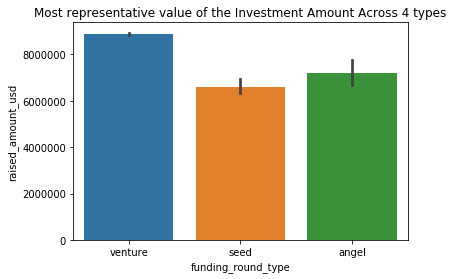

<Figure size 14400x10800 with 0 Axes>

In [367]:
sns.barplot(data = df1, x = 'funding_round_type', y = 'raised_amount_usd', estimator = np.mean)
plt.title('Most representative value of the Investment Amount Across 4 types')
plt.figure(figsize=(200,150))

In [368]:
top9_new

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaT,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-05-01,10000000.0,Media
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,2007-01-01,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0,Curated Web
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,1997-01-01,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,2009-12-21,719491.0,Biotechnology
10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,2011-01-01,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-09-11,20000000.0,Analytics
11,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,2011-01-01,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,2013-03-01,1700000.0,Analytics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114922,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,1998-01-01,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,2013-11-07,14219999.0,Biotechnology
114923,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,1998-01-01,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,NaN,2010-01-29,555016.0,Biotechnology
114934,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaT,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,2012-10-18,140500.0,E-Commerce
114936,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaT,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,2004-12-16,8500000.0,Biotechnology


<Figure size 14400x10800 with 0 Axes>

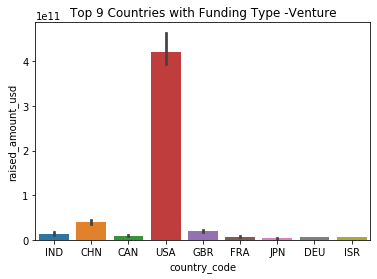

<Figure size 14400x10800 with 0 Axes>

In [372]:
sns.barplot(data = top9_new, x = 'country_code', y = 'raised_amount_usd', estimator = np.sum)
plt.title('Top 9 Countries with Funding Type -Venture')
plt.xlabel ='Countries'
plt.ylabel ='Sum of Investments'
plt.figure(figsize=(200,150))

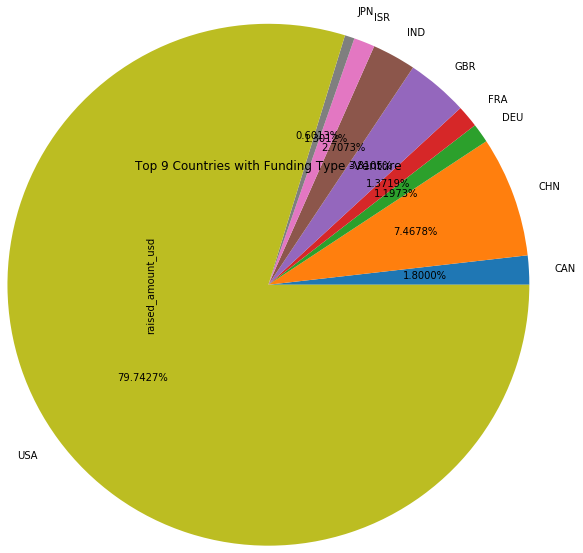

In [374]:
top9_new.groupby(["country_code"])["raised_amount_usd"].sum().plot.pie(autopct='%1.4f%%',radius=3,title='Top 9 Countries with Funding Type -Venture',)

In [386]:
mergedframe = pd.concat([mf_USA[0:3],mf_GBR[0:3],mf_IND[0:3]], axis=0, join='outer', ignore_index=False)

In [387]:
mergedframe

,country_code,main_sector,Count,Total Investment
6,USA,Others,2950,2.632101e+10
7,USA,"Social, Finance, Analytics, Advertising",2714,2.380738e+10
1,USA,Cleantech / Semiconductors,2300,2.120663e+10
6,GBR,Others,147,1.283624e+09
7,GBR,"Social, Finance, Analytics, Advertising",133,1.089404e+09
1,GBR,Cleantech / Semiconductors,128,1.150140e+09
6,IND,Others,110,1.013410e+09
7,IND,"Social, Finance, Analytics, Advertising",60,5.505496e+08
5,IND,"News, Search and Messaging",52,4.338345e+08


Text(0.5, 1.0, 'USA')

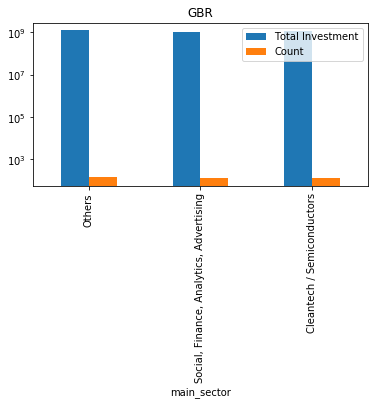

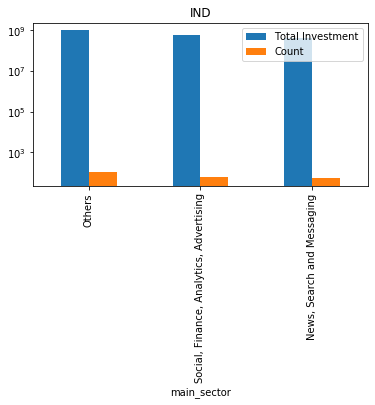

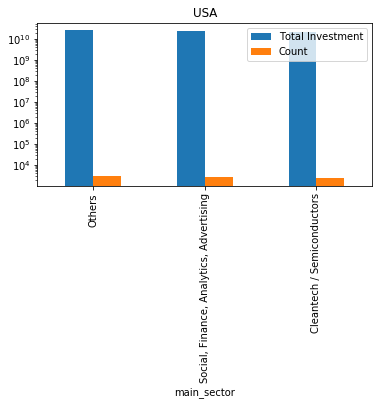

In [389]:
ax=mergedframe.groupby(by='country_code').plot(x='main_sector',y=['Total Investment','Count'],stacked=False,kind='bar',figsize=[6,3],logy=True,title='Investment Across top 3 English speaking countries')
#ax.subplots(1, 3)
#set_title('Investment Across top 3 English speaking countries')
ax[0].set_title('GBR')
ax[1].set_title('IND')
ax[2].set_title('USA')

Text(0.5, 1.0, 'USA')

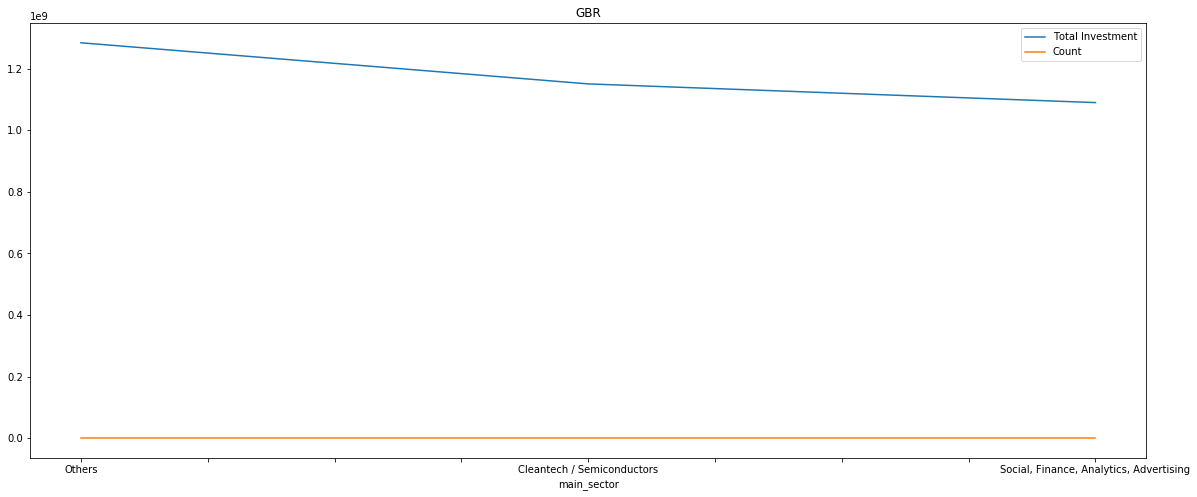

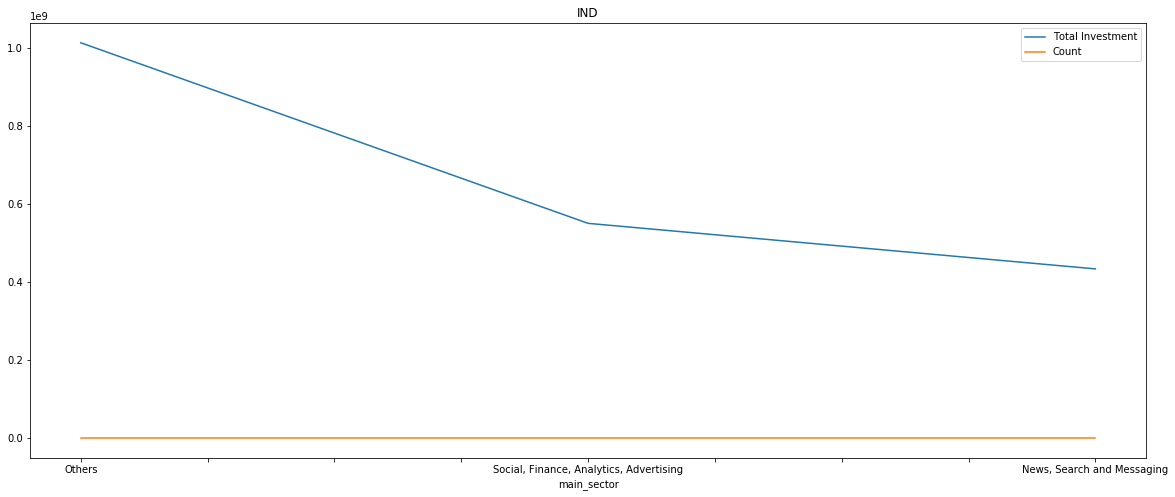

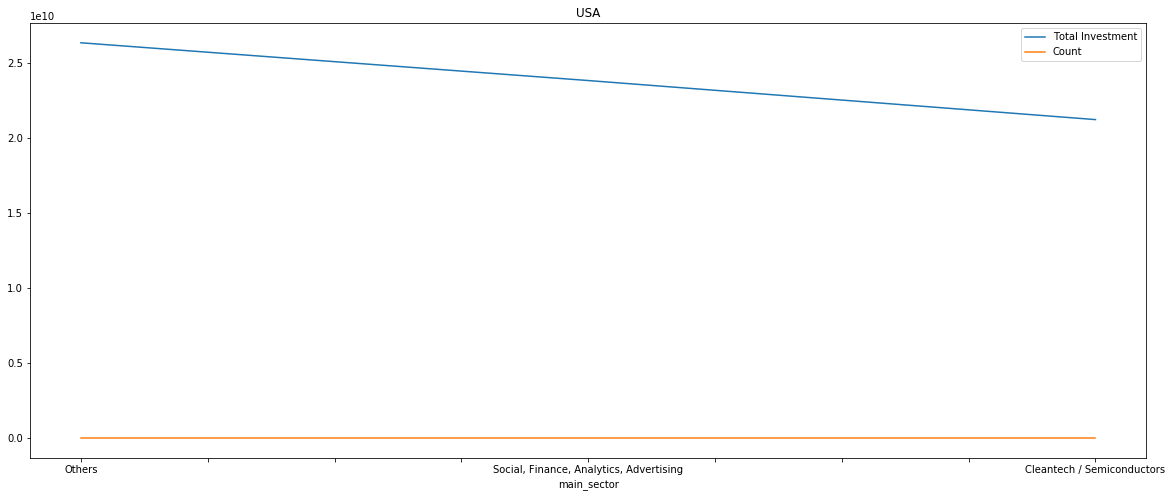

In [142]:
ax=mergedframe.groupby(by='country_code').plot(x='main_sector',y=['Total Investment','Count'],stacked=False,kind='line',figsize=[20,8],title='Investment Across top 3 English speaking countries')
#ax.subplots(1, 3)
#set_title('Investment Across top 3 English speaking countries')
ax[0].set_title('GBR')
ax[1].set_title('IND')
ax[2].set_title('USA')
#df.plot()

#As the best performing main_sector across the venture funding type in top 3 English speaking countries. Analyse the most effective category in the Others sector further down

#India

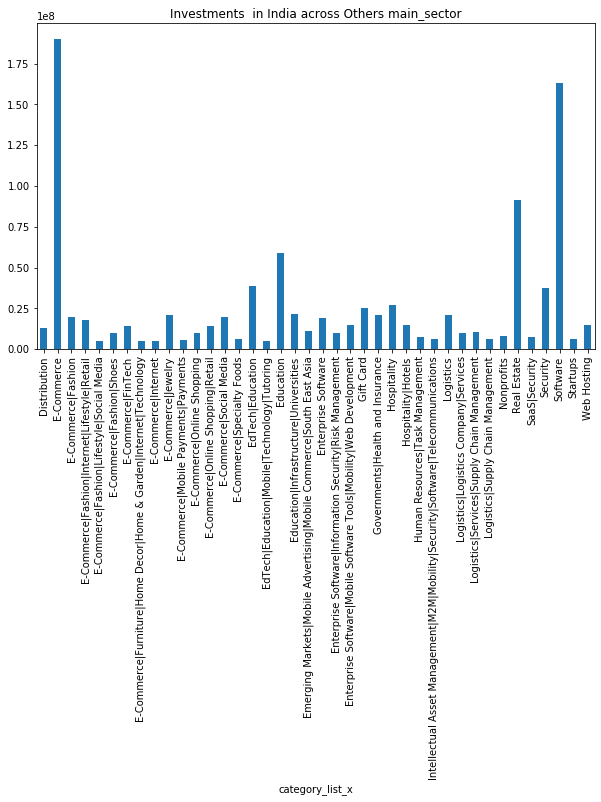

In [390]:
masterframe_IND[masterframe_IND['main_sector']=='Others'].groupby(by="category_list_x")['raised_amount_usd'].apply(lambda x: x.sum()).plot(stacked=False,kind='bar',figsize=[10,6])
plt.title('Investments  in India across Others main_sector')
plt.show()

#masterframe_IND.groupby(masterframe_IND['main_sector'])['raised_amount_usd'].sum().plot()

In [392]:
masterframe_IND[((masterframe_IND['main_sector']=='Others') & (masterframe_IND['category_list_x']=='Software'))].groupby(by='name')['raised_amount_usd'].apply( lambda x: x.count())
#masterframe_IND[(masterframe_IND['main_sector']=='Others')]
#bycomp.groupby(by='name')['raised_amount_usd'].apply( lambda x: x.count())
#plt.scatter(masterframe_IND.raised_amount_usd,masterframe_IND[((masterframe_IND['main_sector']=='Others') & (masterframe_IND['category_list_x']=='Software'))]['name'],marker=1,)
#plt.show()

#masterframe_IND.groupby(masterframe_IND['main_sector'])['raised_amount_usd'].sum().plot()

name
Ameyo                                      1
AppLabs                                    1
Appsdaily Solutions                        1
CE Info Systems                            1
Canvera Digital Technologies               1
Cooptions Technologies                     1
Elitecore Technologies                     1
EximSoft-Trianz                            1
GoldVIP Technology Solutions (Crown-it)    1
Hurix Systems Private                      1
Monarch Innovative Technologies            1
MySmartPrice                               1
Newgen Software Technologies               1
NxtGen Data Center & Cloud Services        2
Prime Focus Technologies                   1
Quick Heal Technologies                    1
eYantra Industries                         1
iCreate Software                           1
Name: raised_amount_usd, dtype: int64

#GBR

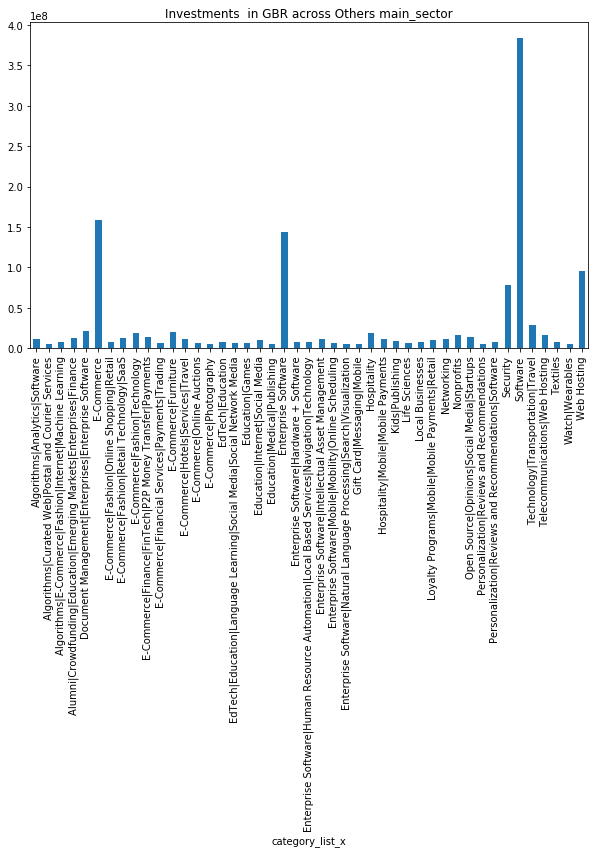

In [393]:
masterframe_GBR[masterframe_GBR['main_sector']=='Others'].groupby(by="category_list_x")['raised_amount_usd'].apply(lambda x: x.sum()).plot(stacked=False,kind='bar',figsize=[10,6])
plt.title('Investments  in GBR across Others main_sector')
plt.show()

In [394]:
masterframe_GBR[((masterframe_GBR['main_sector']=='Others') & (masterframe_GBR['category_list_x']=='Software'))].groupby(by='name')['raised_amount_usd'].apply( lambda x: x.count()).sort_values(ascending=False)

name
Electric Cloud                 4
Njini                          2
ip.access                      2
Zeus                           2
Jobpartners                    2
Helveta                        2
Tribold                        2
Eglue Business Technologies    2
Cytura Corp                    1
EnvironmentIQ                  1
picoChip                       1
Clarisite                      1
KeTech                         1
BullGuard                      1
Bacula Systems                 1
BIZZBY                         1
Azure Solutions                1
Antenna Software               1
Celona Technologies            1
Open Energi                    1
Neverfail                      1
OrderDynamics                  1
Origami Energy                 1
Rhetorical Systems             1
Rootstock Software             1
Semmle                         1
Site Intelligence              1
SiteMinder                     1
Trema Group                    1
Unii                           1
Volan

#USA

In [395]:
masterframe_USA[((masterframe_USA['main_sector']=='Others') & (masterframe_USA['category_list_x']=='Software'))].groupby(by='name')['raised_amount_usd'].apply( lambda x: x.count()).sort_values(ascending=False)

name
Mantara                  5
Carbon Design Systems    5
aPriori Technologies     5
goBalto                  4
Spigit                   4
                        ..
Passare, Inc.            1
Paisley                  1
Page Foundry             1
PCC Technology Group     1
.Club Domains            1
Name: raised_amount_usd, Length: 718, dtype: int64

In [396]:
masterframe_USA[masterframe_USA['main_sector']=='Others'].groupby(by="category_list_x")['raised_amount_usd'].count().sort_values(ascending =False)[:15]

category_list_x
Software                          994
Enterprise Software               405
Security                          181
Web Hosting                       159
E-Commerce                        126
Technology                         41
Education                          35
Hospitality                        32
EdTech|Education                   30
Real Estate                        21
SaaS|Software                      16
Services                           14
Legal                              11
Enterprise Software|Software       10
Enterprise Software|Technology     10
Name: raised_amount_usd, dtype: int64

In [397]:
masterframe_USA[masterframe_USA['main_sector']=='Others'].groupby(by="category_list_x")['raised_amount_usd'].sum().sort_values(ascending =False)

category_list_x
Software                                                                                         8.675405e+09
Enterprise Software                                                                              3.739917e+09
Security                                                                                         1.663478e+09
Web Hosting                                                                                      1.558963e+09
E-Commerce                                                                                       1.107612e+09
                                                                                                     ...     
Education|Finance|Social Network Media                                                           5.000000e+06
Intellectual Asset Management                                                                    5.000000e+06
E-Commerce|Enterprise Software|Loyalty Programs|Social Media                                     5.00000

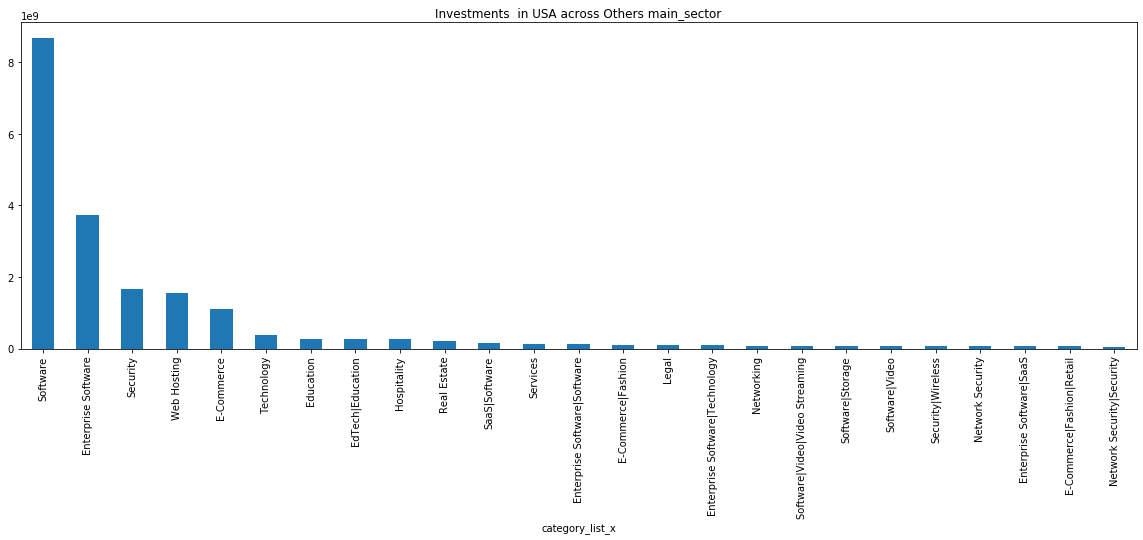

In [398]:
masterframe_USA[masterframe_USA['main_sector']=='Others'].groupby(by="category_list_x")['raised_amount_usd'].apply(lambda x: x.sum()).sort_values(ascending=False)[:25].plot(stacked=False,kind='bar',figsize=[20,6])
plt.title('Investments  in USA across Others main_sector')
plt.show()

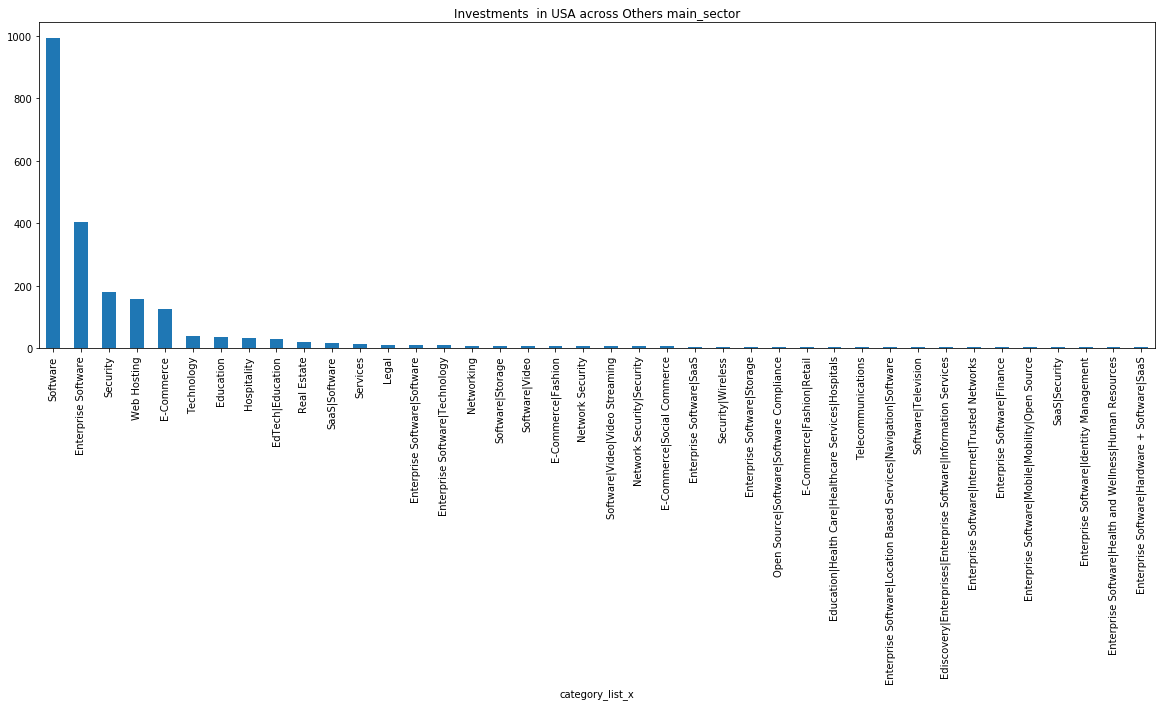

In [236]:
masterframe_USA[masterframe_USA['main_sector']=='Others'].groupby(by="category_list_x")['raised_amount_usd'].apply(lambda x: x.count()).sort_values(ascending=False)[:40].plot(stacked=False,kind='bar',figsize=[20,6])
plt.title('Investments  in USA across Others main_sector')
plt.show()

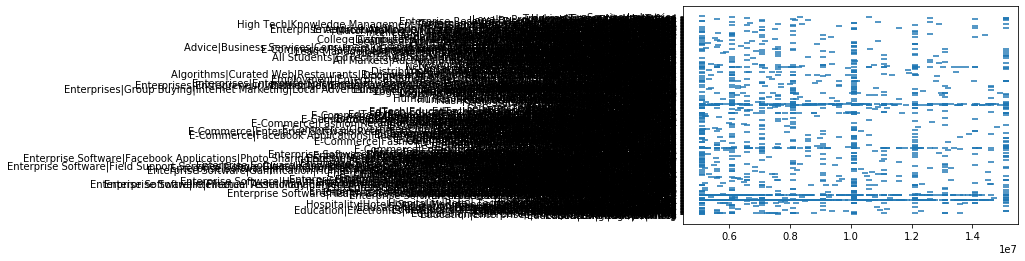

<Figure size 14400x14400 with 0 Axes>

In [399]:
plt.scatter(masterframe_USA[masterframe_USA['main_sector']=='Others'].raised_amount_usd,masterframe_USA[masterframe_USA['main_sector']=='Others'].category_list_x,marker=1)
plt.figure(figsize=(200,200))
plt.show()

#List of categories in Others main_sector

In [400]:
str((df_sectorsbyCat[df_sectorsbyCat['main_sector'] =='Others'].groupby('main_sector', as_index=False).agg({'category_list' : '|'.join})['category_list']).iloc[0])


'Advice|Algorithms|All Markets|All Students|Alumni|Angels|Collectibles|College Campuses|Distribution|Distributors|DIY|Document Management|E-Commerce|E-Commerce Platforms|EDA Tools|Ediscovery|EdTech|Education|Emerging Markets|Employment|Engineering Firms|Enterprise 2.na|Enterprise Application|Enterprise Resource Planning|Enterprise Security|Enterprise Software|Enterprises|Entrepreneur|Families|Field Support Services|File Sharing|Flash Sales|Flash Storage|Fleet Management|Flowers|Freelancers|Fruit|Gay & Lesbian|General Public Worldwide|Geospatial|Gift Card|Gift Exchange|Gift Registries|Governance|Government Innovation|Governments|Guides|High School Students|High Schools|High Tech|Home Owners|Home Renovation|Homeland Security|Homeless Shelter|Hospitality|Human Computer Interaction|Human Resource Automation|Human Resources|Humanitarian|IaaS|ICT|Identity|Indians|Indoor Positioning|Intellectual Asset Management|Intellectual Property|Intelligent Systems|Interest Graph|iOS|iPad|iPhone|IT and C

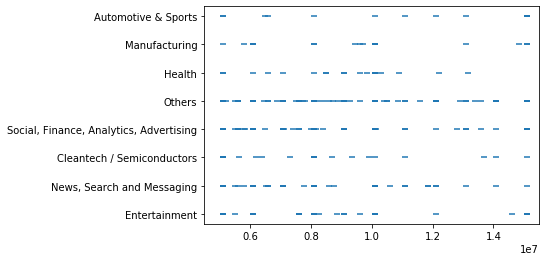

In [144]:
plt.scatter(masterframe_IND.raised_amount_usd,masterframe_IND.main_sector,marker=1,)
plt.show()